#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/precio-portatiles-the-bridge/overview

## Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from Funciones import *

## Data

- Variable a predecir: Price_euros

- Variables predictoras: por defenir

- Variables a desechar: laptop_ID, 

In [2]:
df_test = pd.read_csv('../data/test.csv', index_col=0)
df_test

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,,
181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...
1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg


In [3]:
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_train

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
id,,,,,,,,,,,,,
268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00


In [4]:
sample = pd.read_csv('../data/sample_submission.csv')
sample

,id,Price_euros
0,1014,752.0
1,845,499.0
2,1151,1747.0
3,1265,245.0
4,573,1179.0
...,...,...
386,1162,258.0
387,1286,1085.0
388,336,298.0
389,885,1099.0


## Data exploration

In [5]:
df_train['TypeName'].nunique()

6

In [6]:
df_train['TypeName'].value_counts()

TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

In [7]:
df_train['OpSys'].value_counts()

OpSys
Windows 10      746
Linux            47
No OS            44
Windows 7        32
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      4
Android           2
Name: count, dtype: int64

## Data processing

## Test

In [5]:
# Para este primer modelo voy a limpiar algunas columnas y cambiar su dtype

#Primero ram
df_test['Ram'] = df_test['Ram'].str.replace('GB', '').astype(int)

# Ahora voy a transformar Weight
df_test['Weight'] = df_test['Weight'].str.replace('kg', '').astype(float)

# Voy a renombar  Weight y le pondré Weigh/kg para que sea más descriptiva y se entienda que los valores numericos hacen referencia a su peso en kg

df_test = df_test.rename(columns={'Weight': 'Weight/kg'})

In [6]:
print (df_test.columns)

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight/kg'],
      dtype='object')


In [7]:
# Me haré un segundo DF donde desecho las primeras dos columnas porque no las necesito para la predicción

df2_t = df_test.drop(['laptop_ID'], axis=1)

# Voy a ver si puedo sacarle provecho al typeName
# df2_t = df2_t.drop(['TypeName'], axis=1)

In [8]:
print (df2_t.columns)

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight/kg'],
      dtype='object')


In [9]:
# Función que agrupa OS
def group_os(name):
    if 'Windows' in name:
        return 'Windows'
    elif re.search(r'mac', name, re.IGNORECASE):
        return 'Mac'
    elif name in ['Linux', 'Chrome OS', 'Android']:
        return 'Other OS'
    else:
        return 'No OS/Other'

In [10]:
df2_t['TypeName'].value_counts()

TypeName
Notebook              205
Gaming                 67
Ultrabook              61
2 in 1 Convertible     36
Workstation            11
Netbook                11
Name: count, dtype: int64

In [11]:
# Agrupo varias variables
df2_t['OpSys_Grouped'] = df2_t['OpSys'].apply(group_os)
df2_t['Company_Grouped'] = df2_t['Company'].apply(agrupar_marcas)

In [15]:
# #  Aplicar One-Hot Encoding a la variable TypeName, al ser tan pocos no hizo falta agruparlos primero
# df_encoded_test = pd.get_dummies(df2_t, columns=['TypeName', "OpSys_Grouped", "Company_Grouped"])

In [12]:
df2_t['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                161
1366x768                                          73
IPS Panel Full HD 1920x1080                       67
IPS Panel Full HD / Touchscreen 1920x1080         16
Full HD / Touchscreen 1920x1080                   15
1600x900                                          12
Quad HD+ / Touchscreen 3200x1800                   7
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      3
Touchscreen 2560x1440                              3
Touchscreen 2256x1504                              3
IPS Panel Quad HD+ / Touchscreen 3200x1800         2
4K Ultra HD 3840x2160                              2
1440x900                                           2
IPS Panel Quad HD+ 2560x1440                       2
4K Ultra HD / Touchscreen 3840x2160                2
IPS Panel Touchscreen 1366x768                     2
IPS Panel 4K Ultra HD 3840x2160                    2
IPS Panel 1366x768                                 2
IPS Panel Retina Display 2560

In [13]:
# Extraigo los pixeles
def extraer_pixeles(resolucion):
    # Busca dos números separados por 'x' o 'X'
    match = re.search(r'(\d+)x(\d+)', resolucion, re.IGNORECASE)
    if match:
        ancho, alto = map(int, match.groups())
        return ancho * alto
    else:
        return None  # O un valor por defecto, como 0 o -1


In [14]:
# Función extrae los screen featuring
def screen_featuring(row):
    ips = 'IPS' in row
    touchscreen = 'Touchscreen' in row
    return pd.Series([ips, touchscreen])

In [17]:
# Extraer los píxeles
df2_t['Pixeles_Total'] = df2_t['ScreenResolution'].apply(extraer_pixeles)

# Extraer características de la pantalla
df2_t[['IPS', 'Touchscreen']] = df2_t['ScreenResolution'].apply(screen_featuring)


In [18]:
# #  Aplicar One-Hot Encoding a la variable TypeName, al ser tan pocos no hizo falta agruparlos primero
# # df_encoded_test = pd.get_dummies(df2_t, columns=['TypeName', "OpSys_Grouped", "Company_Grouped"])
# df_encoded_test = pd.get_dummies(df2_t, columns=['TypeName'])
# df_encoded_test

,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight/kg,...,Company_Grouped,Pixeles_Total,IPS,Touchscreen,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
id,,,,,,,,,,,,,,,,,,,,,
181,HP,Spectre x360,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.30,...,HP,8294400,True,False,False,False,False,False,True,False
708,Acer,Aspire 5,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,...,Acer,1049088,False,False,False,False,False,True,False,False
862,Acer,Aspire ES1-572,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.40,...,Acer,1049088,False,False,False,False,False,True,False,False
1064,HP,EliteBook 1040,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,...,HP,2073600,False,False,False,False,False,True,False,False
702,HP,ENVY -,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,...,HP,2073600,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,Lenovo,Legion Y520-15IKBN,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,...,Lenovo,2073600,True,False,False,True,False,False,False,False
524,Lenovo,IdeaPad Y700-15ISK,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,...,Lenovo,2073600,True,False,False,True,False,False,False,False
1015,HP,250 G5,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.96,...,HP,1049088,False,False,False,False,False,True,False,False


In [19]:
df_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 181 to 1036
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company                      391 non-null    object 
 1   Product                      391 non-null    object 
 2   Inches                       391 non-null    float64
 3   ScreenResolution             391 non-null    object 
 4   Cpu                          391 non-null    object 
 5   Ram                          391 non-null    int32  
 6   Memory                       391 non-null    object 
 7   Gpu                          391 non-null    object 
 8   OpSys                        391 non-null    object 
 9   Weight/kg                    391 non-null    float64
 10  OpSys_Grouped                391 non-null    object 
 11  Company_Grouped              391 non-null    object 
 12  Pixeles_Total                391 non-null    int64  
 13  IPS                   

In [46]:
df_encoded_test['Memory'].value_counts()

Memory
256GB SSD                 119
1TB HDD                    73
512GB SSD                  43
128GB SSD +  1TB HDD       33
500GB HDD                  32
256GB SSD +  1TB HDD       21
128GB SSD                  20
32GB Flash Storage         11
256GB SSD +  2TB HDD        6
1TB SSD                     5
2TB HDD                     5
64GB Flash Storage          4
512GB SSD +  1TB HDD        4
16GB Flash Storage          3
128GB Flash Storage         2
1.0TB Hybrid                2
256GB SSD +  256GB SSD      1
128GB SSD +  2TB HDD        1
256GB Flash Storage         1
512GB SSD +  2TB HDD        1
128GB HDD                   1
508GB Hybrid                1
512GB SSD +  256GB SSD      1
32GB SSD                    1
Name: count, dtype: int64

In [47]:
df_encoded_test['Memory'].value_counts(normalize=True)

Memory
256GB SSD                 0.304348
1TB HDD                   0.186701
512GB SSD                 0.109974
128GB SSD +  1TB HDD      0.084399
500GB HDD                 0.081841
256GB SSD +  1TB HDD      0.053708
128GB SSD                 0.051151
32GB Flash Storage        0.028133
256GB SSD +  2TB HDD      0.015345
1TB SSD                   0.012788
2TB HDD                   0.012788
64GB Flash Storage        0.010230
512GB SSD +  1TB HDD      0.010230
16GB Flash Storage        0.007673
128GB Flash Storage       0.005115
1.0TB Hybrid              0.005115
256GB SSD +  256GB SSD    0.002558
128GB SSD +  2TB HDD      0.002558
256GB Flash Storage       0.002558
512GB SSD +  2TB HDD      0.002558
128GB HDD                 0.002558
508GB Hybrid              0.002558
512GB SSD +  256GB SSD    0.002558
32GB SSD                  0.002558
Name: proportion, dtype: float64

In [ ]:
""" Vale, entonces lo que voy a hacer es sacar la cantidad de gb que tenga cada memoria, incluyendo los tb, convertirlos en gb,  
    y por otro lado, sacar el tipo de la memoria, estaba pensando en hacer un one hot encoding a través de get dummies 
    pero tengo mi hipotesis que agregar tantas variables puede darle complejidad a mi modelo"""

## Función para extraer_gb

In [20]:
def extraer_gb(memoria):
    total_gb = 0

    # Buscar GB
    matches_gb = re.findall(r'(\d+)GB', memoria)
    for match in matches_gb:
        total_gb += int(match)

    # Buscar TB y convertir a GB (1 TB = 1024 GB)
    matches_tb = re.findall(r'(\d+)TB', memoria)
    for match in matches_tb:
        total_gb += int(match) * 1024

    return total_gb if total_gb > 0 else 0  # Devuelve 0 si no se encuentra nada


## Función para códificar el tipo de memoria

In [21]:
def codificar_tipo_memoria(memoria):
    if 'SSD' in memoria:
        return 1
    elif 'HDD' in memoria:
        return 2
    elif 'Hybrid' in memoria:
        return 3
    elif 'Flash' in memoria:
        return 4
    else:
        return 0  # O algún otro código para tipos no listados

In [22]:
df2_t['Total_Memory_GB'] = df2_t['Memory'].apply(extraer_gb)
df2_t['Memory_Type_Code'] = df2_t['Memory'].apply(codificar_tipo_memoria)

In [23]:
df2_t

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight/kg,OpSys_Grouped,Company_Grouped,Pixeles_Total,IPS,Touchscreen,Total_Memory_GB,Memory_Type_Code
id,,,,,,,,,,,,,,,,,,
181,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.30,Windows,HP,8294400,True,False,512,1
708,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,Windows,Acer,1049088,False,False,256,1
862,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.40,Other OS,Acer,1049088,False,False,500,2
1064,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,Windows,HP,2073600,False,False,256,1
702,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,Windows,HP,2073600,True,False,256,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,No OS/Other,Lenovo,2073600,True,False,256,1
524,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,Windows,Lenovo,2073600,True,False,512,1
1015,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.96,No OS/Other,HP,1049088,False,False,500,2


In [25]:
df_encoded_test = pd.get_dummies(df2_t, columns=['TypeName'])
df_encoded_test['Memory_Type_Code'].value_counts()

Memory_Type_Code
1    256
2    111
4     21
3      3
Name: count, dtype: int64

In [30]:
df_encoded_test

,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight/kg,...,IPS,Touchscreen,Total_Memory_GB,Memory_Type_Code,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
id,,,,,,,,,,,,,,,,,,,,,
181,HP,Spectre x360,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.30,...,True,False,512,1,False,False,False,False,True,False
708,Acer,Aspire 5,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,...,False,False,256,1,False,False,False,True,False,False
862,Acer,Aspire ES1-572,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.40,...,False,False,500,2,False,False,False,True,False,False
1064,HP,EliteBook 1040,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,...,False,False,256,1,False,False,False,True,False,False
702,HP,ENVY -,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,...,True,False,256,1,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,Lenovo,Legion Y520-15IKBN,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,...,True,False,256,1,False,True,False,False,False,False
524,Lenovo,IdeaPad Y700-15ISK,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,...,True,False,512,1,False,True,False,False,False,False
1015,HP,250 G5,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,No OS,1.96,...,False,False,500,2,False,False,False,True,False,False


## Train

In [26]:
# Para este primer modelo voy a limpiar algunas columnas y cambiar su dtype

#Primero ram
df_train['Ram'] = df_train['Ram'].str.replace('GB', '').astype(int)

# Ahora voy a transformar Weight
df_train['Weight'] = df_train['Weight'].str.replace('kg', '').astype(float)

# Voy a renombar  Weight y le pondré Weigh/kg para que sea más descriptiva y se entienda que los valores numericos hacen referencia a su peso en kg

df_train = df_train.rename(columns={'Weight': 'Weight/kg'})

In [27]:
# Me haré un segundo DF donde desecho las primeras dos columnas porque no las necesito para la predicción

df2 = df_train.drop(['laptop_ID'], axis=1)

# Voy a ver si puedo sacarle provecho al typeName
# df2 = df2.drop(['TypeName'], axis=1)

In [28]:
# Agrupo varias variables
df2['OpSys_Grouped'] = df2['OpSys'].apply(group_os)
df2['Company_Grouped'] = df2['Company'].apply(agrupar_marcas)

# Extraigo y creo otras variables
# Extraer los píxeles
df2['Pixeles_Total'] = df2['ScreenResolution'].apply(extraer_pixeles)

# Extraer características de la pantalla
df2[['IPS', 'Touchscreen']] = df2['ScreenResolution'].apply(screen_featuring)

# Extraer cantidad y codificar las memorias
df2['Total_Memory_GB'] = df2['Memory'].apply(extraer_gb)
df2['Memory_Type_Code'] = df2['Memory'].apply(codificar_tipo_memoria)

In [29]:
#  Aplicar One-Hot Encoding a la variable TypeName, al ser tan pocos no hizo falta agruparlos primero
df_encoded_train = pd.get_dummies(df2, columns=['TypeName'])
df_encoded_train

,Company,Product,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight/kg,...,IPS,Touchscreen,Total_Memory_GB,Memory_Type_Code,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
id,,,,,,,,,,,,,,,,,,,,,
268,Dell,Inspiron 5567,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,...,False,False,1024,2,False,False,False,True,False,False
347,Asus,X541NA (N4200/4GB/1TB/W10),15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,...,False,False,1024,2,False,False,False,True,False,False
353,Toshiba,Portege Z30-C-1CW,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,...,False,False,256,1,False,False,False,True,False,False
578,Dell,Alienware 17,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,...,True,False,1280,1,False,True,False,False,False,False
42,Dell,Latitude E7270,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,...,False,True,256,1,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Acer,Chromebook C738T-C2EJ,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,...,True,True,32,4,True,False,False,False,False,False
716,Toshiba,Portege Z30-C-16H,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,...,False,False,128,1,False,False,False,True,False,False
517,Acer,Aspire ES1-523,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8,1TB HDD,AMD Radeon R5,Windows 10,2.40,...,False,False,1024,2,False,False,False,True,False,False


In [31]:
print (df_encoded_train.columns)

Index(['Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight/kg', 'Price_euros', 'OpSys_Grouped',
       'Company_Grouped', 'Pixeles_Total', 'IPS', 'Touchscreen',
       'Total_Memory_GB', 'Memory_Type_Code', 'TypeName_2 in 1 Convertible',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation'],
      dtype='object')


In [33]:
m_corr = df_encoded_train[['Ram', 'Weight/kg', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'TypeName_2 in 1 Convertible', 'Pixeles_Total', 'IPS', 'Touchscreen', "Total_Memory_GB", "Memory_Type_Code", 'Price_euros']].corr()

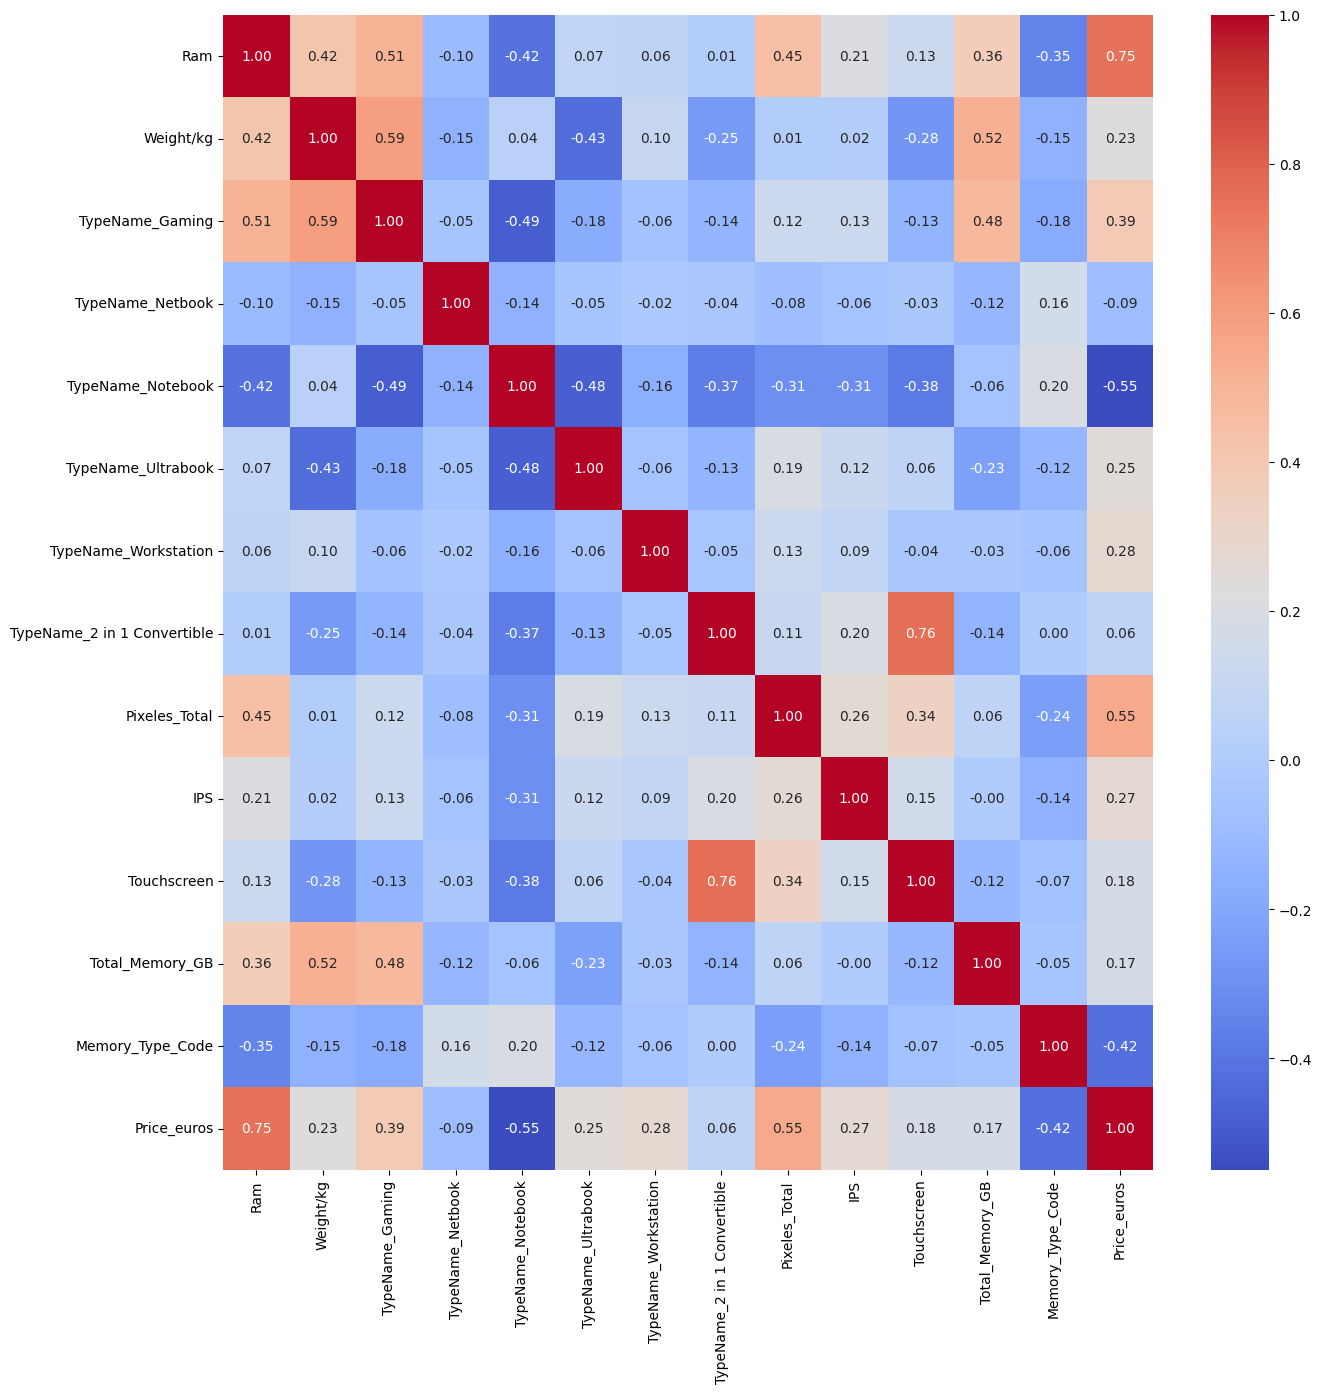

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(m_corr, annot=True, fmt=".2f", annot_kws={'size': 10}, cmap='coolwarm');

In [29]:
"""Corregí un fallo que tenía al agrupar los sistemas operativos, algunos de Mac los estaba enviando a OS """
# df2[df2['OpSys_Grouped'] == 'Mac']
# # df2[df2['Company']== 'Apple']

'Corregí un fallo que tenía al agrupar los sistemas operativos, algunos de Mac los estaba enviando a OS '

In [30]:
# sns.heatmap(df_encoded[['TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'Price_euros']].corr(), annot= True)
# sns.heatmap(df_encoded.corr(numeric_only=True), annot= True, cmap='coolwarm')
# df_encoded['Gpu'].unique()

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [35]:
df_encoded_train.columns

Index(['Company', 'Product', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight/kg', 'Price_euros', 'OpSys_Grouped',
       'Company_Grouped', 'Pixeles_Total', 'IPS', 'Touchscreen',
       'Total_Memory_GB', 'Memory_Type_Code', 'TypeName_2 in 1 Convertible',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation'],
      dtype='object')

In [37]:
# X = df_encoded_train.drop(['Price_euros'], axis=1)
# y = df_encoded_train['Price_euros']

### 2. Dividir X_train, X_test, y_train, y_test

In [36]:
X_train = df_encoded_train[['Ram', 'Weight/kg', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'TypeName_2 in 1 Convertible', 'Pixeles_Total', 'IPS', 'Touchscreen', 'Total_Memory_GB', 'Memory_Type_Code']]
X_test = df_encoded_test[['Ram', 'Weight/kg', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'TypeName_2 in 1 Convertible', 'Pixeles_Total', 'IPS', 'Touchscreen', 'Total_Memory_GB', 'Memory_Type_Code']]
y_train = df_encoded_train['Price_euros']
y_test = sample['Price_euros']

### 3. Crear y entrenar el modelo


In [38]:
#creating LinearRegression Object
lm = LinearRegression()
#Training the Data Model
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
# Hago mis predicciones
predictions = lm.predict(X_test)

In [40]:
predictions

array([2655.55869112,  915.63968721,  480.0534007 ,  998.9929411 ,
       1005.78626071, 1829.46800198, 1897.39886877,  536.35079028,
       5574.20620354, 1386.02084766, 1435.69880456,  465.84973826,
        356.81189204,  707.8193381 ,  538.98109814, 1223.66557521,
        587.53423422, 1387.59903238, 1230.76740643, 1403.07191439,
       1492.63456358, 1254.13621789, 1562.39206205, 1432.80546592,
       1864.61339069,  812.49341257,  838.73147845,  465.84973826,
       1158.73566192,  434.84841217, 1371.00129787, 1009.20566093,
       1835.68000424,  740.64850055,  538.98109814, 1867.24369855,
       1019.24631162,  747.17878938, 3134.85077412,  740.64850055,
        472.16247712, 1006.09477232, 1419.86040387, 1861.41154044,
       1383.55228695, 1514.188455  ,  537.66594421, 3113.79723852,
        435.37447374, 1809.02231527, 1031.03721617,  852.14604854,
       1020.9842885 ,  474.79278498, 1228.18257939,  568.88482027,
        703.61084552,  102.1064909 ,  997.1517256 , 1312.68438

In [41]:
from sklearn import metrics

lm.score(X_test, y_test)

-0.8024488534449064

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 676.2899850632482


In [44]:
from sklearn.metrics import mean_absolute_error

# Ahora voy a escalar a ver si me da mejores resultados

# Ahora voy a escalarlo
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)
# Hacer predicciones con los datos de prueba escalados
predictions_scaled = lm_scaled.predict(X_test_scaled)

# Evaluar el modelo
print('MAE:', mean_absolute_error(y_test, predictions_scaled))

score_scaled = lm_scaled.score(X_test_scaled, y_test)
print("Coeficiente de determinación (R^2) en datos escalados:", score_scaled)

MAE: 672.8680068060111
Coeficiente de determinación (R^2) en datos escalados: -0.7803247145688081


In [45]:
dicccionario ={'id':df_encoded_test.index,"Price_euros": predictions_scaled}

In [46]:
df_scal = pd.DataFrame(dicccionario)
df_scal

,id,Price_euros
0,181,2637.686789
1,708,919.044771
2,862,480.783823
3,1064,1020.239458
4,702,1031.869062
...,...,...
386,1281,1366.869062
387,524,1956.948436
388,1015,477.783823
389,1236,583.978510


### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [47]:
df_scal.to_csv('cuarto_modelo_scal.csv', index=False)